# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv'
df_raw = pd.read_csv(url)
df_raw.to_csv('../data/raw/titanic_train.csv')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_raw.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,NaN,S
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C


In [7]:
df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df_interim = df_raw.copy()

In [91]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [93]:
df_interim['Embarked'].value_counts()

2.0    646
1.0    168
0.0     77
Name: Embarked, dtype: int64

In [16]:
df_interim['Age'][np.isnan(df_interim['Age'])] = df_interim['Age'].mean()

/tmp/ipykernel_229548/1997469040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interim['Age'][np.isnan(df_interim['Age'])] = df_interim['Age'].mean()


In [17]:
df_interim['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df_interim['Survived'].value_counts()/len(df_interim['Survived'])

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Obs: el dataset está ligeramente desbalanceado. No mirar accuracy y mirar f1.

In [19]:
#Analisis de categóricas:
df_interim['Name']
df_interim['Name'].nunique()

891

Candidato a borrar los nombres ya que son todos diferentes y no aportan nada.

In [20]:
df_interim = df_interim.drop(columns=['Name'])

In [21]:
df_interim['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
# Transformo categorica Sex a numérica con el dict: {'male':1, 'female':0}
df_interim['Sex'] = df_interim['Sex'].map({'male':1, 'female':0})

In [23]:
df_interim = df_interim.drop(columns=['Ticket'])

In [24]:
df_interim['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [25]:
df_interim = df_interim.drop(columns=['Cabin'])

In [26]:
df_interim['Embarked'].nunique()

3

In [27]:
df_interim['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df_interim['Embarked'] = df_interim['Embarked'].map({'S':2, 'C':1, 'Q':0})

In [30]:
df_interim['Embarked'][np.isnan(df_interim['Embarked'])] = 2

/tmp/ipykernel_229548/584931747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interim['Embarked'][np.isnan(df_interim['Embarked'])] = 2


In [31]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [44]:
X = df_interim.drop(columns=['Survived'])
y = df_interim['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=13, test_size=0.2)

In [45]:
scores = cross_val_score(XGBClassifier(), X, y, scoring='neg_mean_squared_error')
RMSE = (-scores)**0.5
AVG_RMSE = scores.mean()
print(f'root mean squared error: {RMSE}')
print(f' average root mean squared error: {AVG_RMSE}')


root mean squared error: [0.58853098 0.45592233 0.40363517 0.42399915 0.38946809]
 average root mean squared error: -0.20972318121900696


In [34]:
model_XGBC = XGBClassifier(random_state=13)
model_XGBC.fit(X_train, y_train)

In [36]:
y_train_pred = model_XGBC.predict(X_train)
y_test_pred = model_XGBC.predict(X_test)

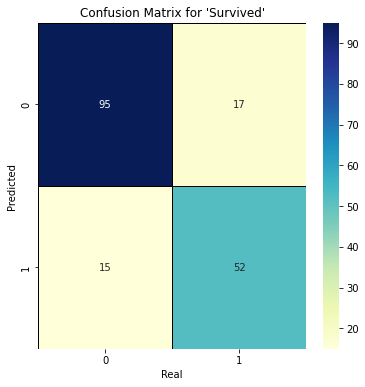

CLASSIFICATION REPORT: "Survived" 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

The score for XGBoost with X_train & y_trains is: 1.0
The score for XGBoost with X_test & y_test is: 0.8212290502793296
Tree params: 
 {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 

In [49]:
y_pred = model_XGBC.predict(X_test)

cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for 'Survived'")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()

print(f'CLASSIFICATION REPORT: "Survived" \n {classification_report(y_test, y_pred)}')

# Get the score of train data just to verify its 1.
score = model_XGBC.score(X_train, y_train)
print(f'The score for XGBoost with X_train & y_trains is: {score}')

#Get the score for the predictions:
score = model_XGBC.score(X_test, y_test)
print(f'The score for XGBoost with X_test & y_test is: {score}')

# Tree params
print(f'Tree params: \n {model_XGBC.get_params()}')

Los resultados son muy buenos sin siquiera hacer un hyperparameter tunning.

In [88]:
params = {
    'learning_rate':[0.4, 0.045, 0.5],
    'max_depth':[3],
    'max_leaves':[1, 2]
}

tuning = GridSearchCV(estimator=XGBClassifier(random_state=13), param_grid=params)
tuning.fit(X_train, y_train)
print(f'Best Parameters: {tuning.best_params_}, Score: {tuning.best_score_}')
estimator=tuning.best_estimator_
print(f'Best Estimator:  {estimator}')

Best Parameters: {'learning_rate': 0.045, 'max_depth': 3, 'max_leaves': 1}, Score: 0.8146459174628188
Best Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.045, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=1, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=13,
              reg_alpha=0, reg_lambda=1, ...)


In [89]:
print(f'BEST HYPERPARAMETERS:')
print(f'learning_rate: {estimator.learning_rate}')
print(f'max_depth: {estimator.max_depth}')
print(f'max_leaves: {estimator.max_leaves}')

BEST HYPERPARAMETERS:
learning_rate: 0.045
max_depth: 3
max_leaves: 1


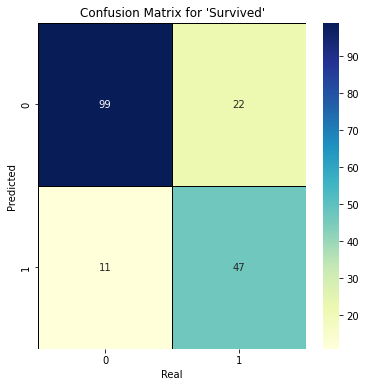

CLASSIFICATION REPORT: "Survived" 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

The score for XGBoost with X_train & y_trains is: 0.8553370786516854
The score for XGBoost with X_test & y_test is: 0.8156424581005587
Tree params: 
 {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.045, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 3, 'max_

In [90]:
model_XGBC = XGBClassifier(
    learning_rate=estimator.learning_rate, max_depth=estimator.max_depth,
    max_leaves=estimator.max_leaves, random_state=13)
model_XGBC.fit(X_train, y_train)

y_train_pred = model_XGBC.predict(X_train)
y_test_pred = model_XGBC.predict(X_test)

y_pred = model_XGBC.predict(X_test)

cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for 'Survived'")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()

print(f'CLASSIFICATION REPORT: "Survived" \n {classification_report(y_test, y_pred)}')

# Get the score of train data just to verify its 1.
score = model_XGBC.score(X_train, y_train)
print(f'The score for XGBoost with X_train & y_trains is: {score}')

#Get the score for the predictions:
score = model_XGBC.score(X_test, y_test)
print(f'The score for XGBoost with X_test & y_test is: {score}')

# Tree params
print(f'Tree params: \n {model_XGBC.get_params()}')